In [33]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions


In [27]:
# 1. Generate Dataset
X, y = make_moons(n_samples=300, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<Axes: >

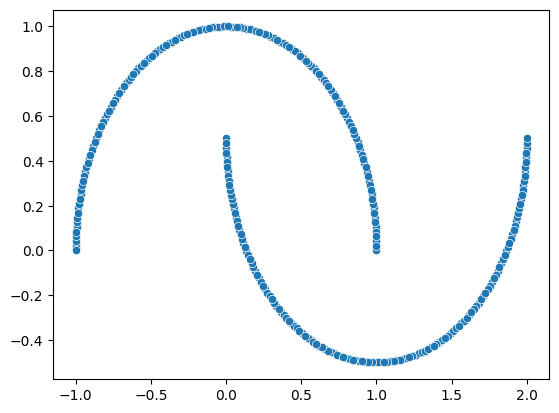

In [28]:
sns.scatterplot(x=X[:,0], y=X[:,1])

<Axes: >

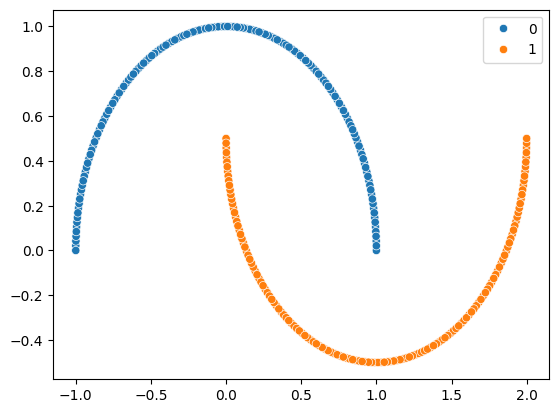

In [29]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [34]:
# 2. Define Models
models = {
    "1. High Var, High Bias\n(LogReg, strong reg)": LogisticRegression(C=0.01),  # High bias from underfitting, high var due to noise
    "2. Low Var, Low Bias\n(SVM, RBF kernel)": SVC(kernel='rbf', C=10, gamma=0.5),  # Ideal scenario
    "3. High Var, Low Bias\n(Deep Tree)": DecisionTreeClassifier(max_depth=None),  # Overfit
    "4. Low Var, High Bias\n(KNN, k=1)": KNeighborsClassifier(n_neighbors=1),  # Overfit, low bias on train
}


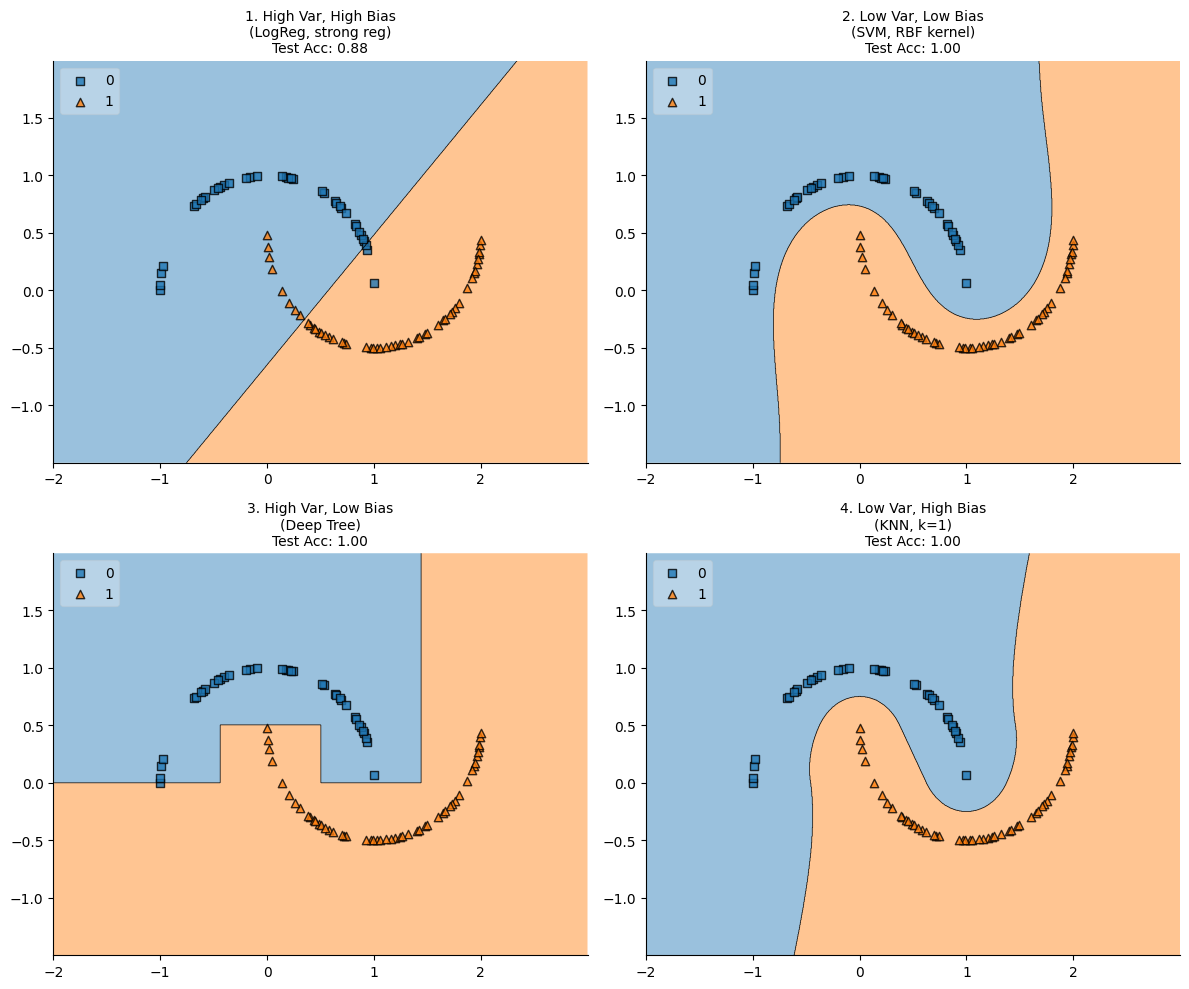

In [35]:
# 3. Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, (title, model) in zip(axes, models.items()):
    model.fit(X_train, y_train)
    plot_decision_regions(X_test, y_test, clf=model, ax=ax, legend=2)
    acc = model.score(X_test, y_test)
    ax.set_title(f"{title}\nTest Acc: {acc:.2f}", fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()


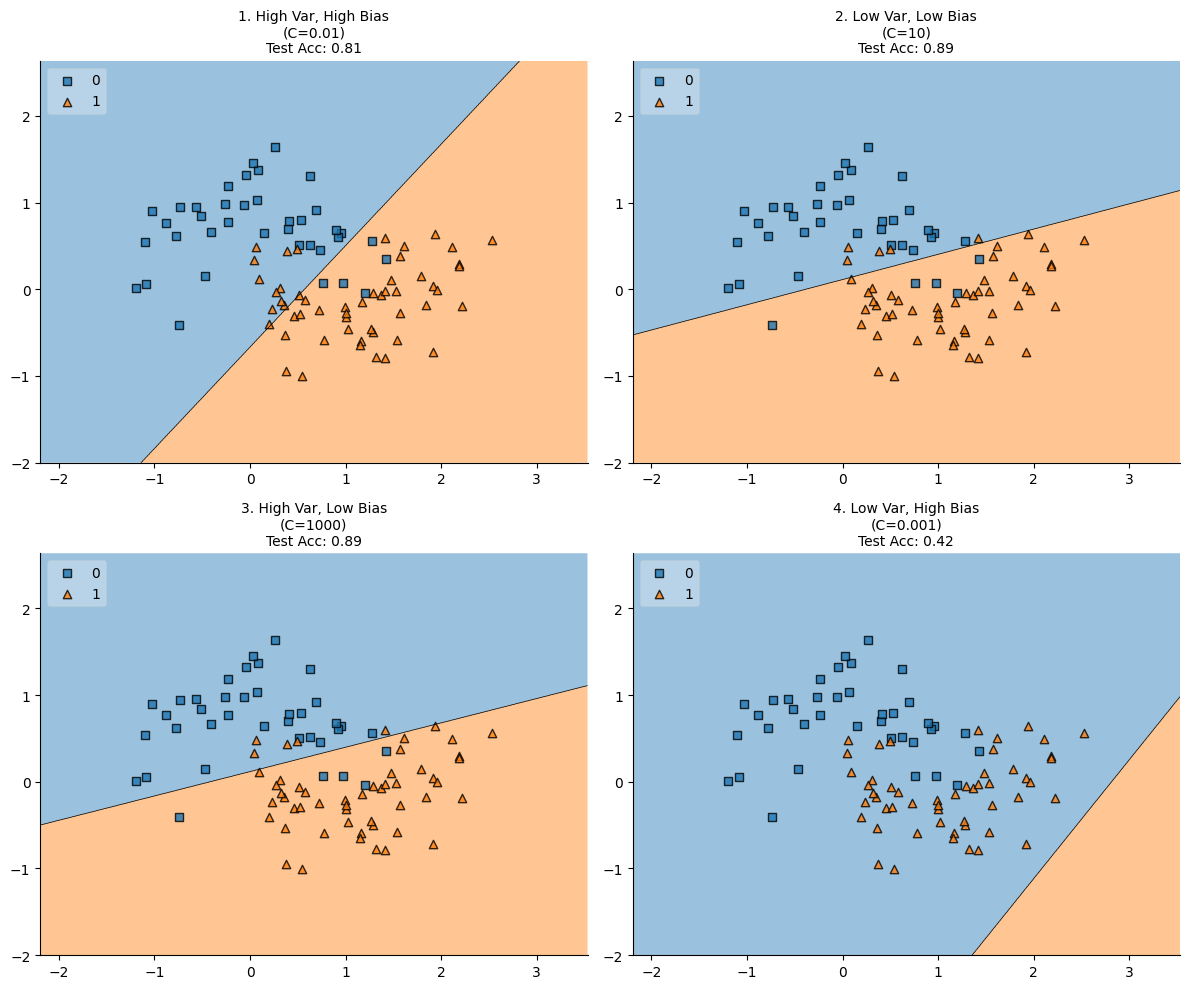

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

# 1. Generate Dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Define Logistic Regression Models with different C (regularization strength)
models = {
    "1. High Var, High Bias\n(C=0.01)": LogisticRegression(C=0.01, solver='lbfgs', max_iter=1000),
    "2. Low Var, Low Bias\n(C=10)": LogisticRegression(C=10, solver='lbfgs', max_iter=1000),
    "3. High Var, Low Bias\n(C=1000)": LogisticRegression(C=1000, solver='lbfgs', max_iter=1000),
    "4. Low Var, High Bias\n(C=0.001)": LogisticRegression(C=0.001, solver='lbfgs', max_iter=1000),
}

# 3. Plot Decision Boundaries
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, (title, model) in zip(axes, models.items()):
    model.fit(X_train, y_train)
    plot_decision_regions(X_test, y_test, clf=model, ax=ax, legend=2)
    acc = model.score(X_test, y_test)
    ax.set_title(f"{title}\nTest Acc: {acc:.2f}", fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()


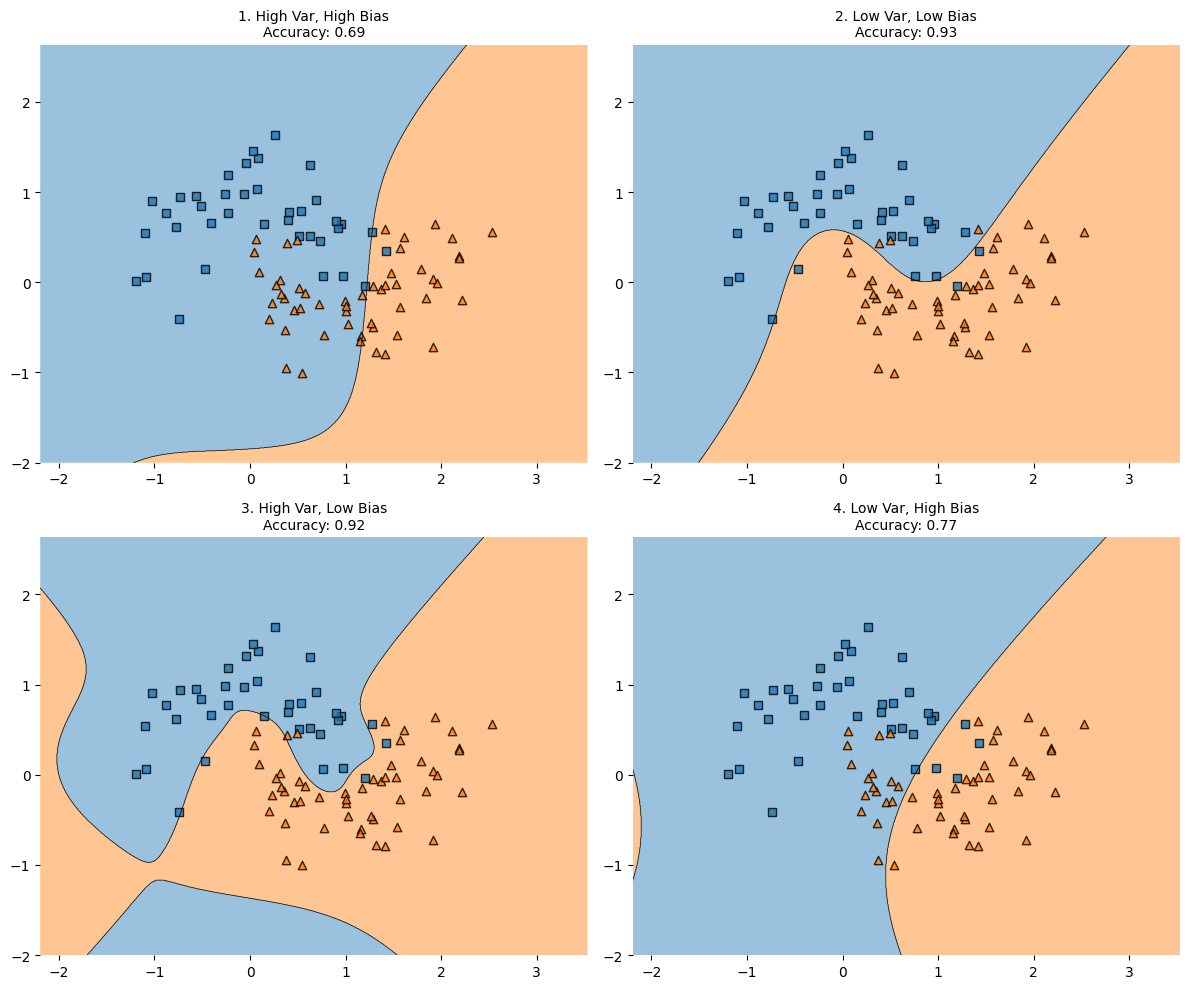

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from mlxtend.plotting import plot_decision_regions

# Create the data
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models: same algorithm, different complexity
models = {
    "1. High Var, High Bias": make_pipeline(PolynomialFeatures(5), LogisticRegression(C=0.001, max_iter=1000)),
    "2. Low Var, Low Bias":   make_pipeline(PolynomialFeatures(3), LogisticRegression(C=10, max_iter=1000)),
    "3. High Var, Low Bias":  make_pipeline(PolynomialFeatures(10), LogisticRegression(C=1000, max_iter=1000)),
    "4. Low Var, High Bias":  make_pipeline(PolynomialFeatures(2), LogisticRegression(C=0.01, max_iter=1000)),
}

# Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, (title, model) in zip(axes, models.items()):
    model.fit(X_train, y_train)
    plot_decision_regions(X_test, y_test, clf=model, ax=ax, legend=0)
    acc = model.score(X_test, y_test)
    ax.set_title(f"{title}\nAccuracy: {acc:.2f}", fontsize=10)

plt.tight_layout()
plt.show()


In [47]:
# Create dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<Axes: >

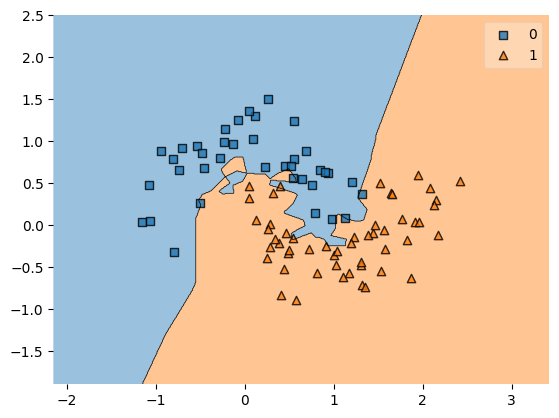

In [48]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)

plot_decision_regions(X_test, y_test, clf=knn_1)


<Axes: >

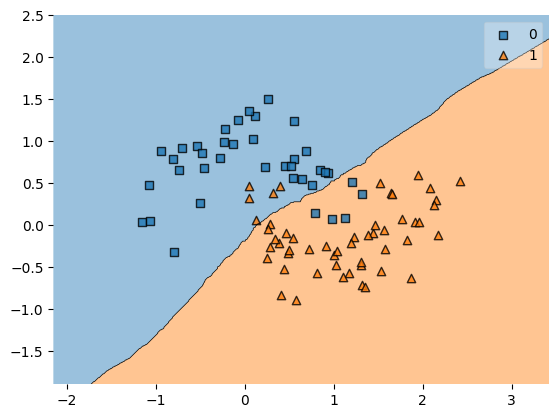

In [50]:
knn_5 = KNeighborsClassifier(n_neighbors=100)
knn_5.fit(X_train, y_train)

plot_decision_regions(X_test, y_test, clf=knn_5,n_jobs=4)